# Clustering jerárquico y dendrogramas
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

El clustering jerarquico es muy popular por que no necesitamos saber a priori el numero de divisiones o cluster en los que vamos a dividir la informacion
* El algoritmo trabaja por nosotros
* **Muy popular para algoritmos no supervisados**
    * Usado en Machine Learning

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

Vamos a iniciar generando datos aleatorios. Por que los podemos tener algo mas "controlados"

(150, 2)


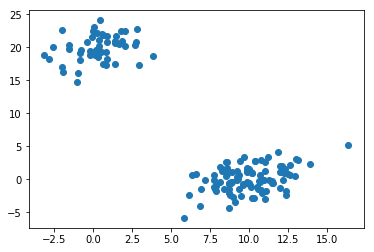

In [8]:
#creamos una semilla
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,]) # normal 10,0, 3;1 1;4 para la multivariable
#generadas dos columnas X e Y con 100 datos distintos [En array]

b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])

X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

150 filas y 2 columnas en total.
* 100 datos son una normal en torno al punto 10 con una desviacion tipica 3 puntos en horizontal 4 en vertical
* otro dataset en 0 en x y 20 en y con datos de desviacion tipica iguales

**NOTA:** Si sientes que tus datos no se han agrupado correctamente si no que han quedado muy maximizados o muy minimizados intenta cambiar de distancia o enlace y ve como se distribuye

In [9]:
Z = linkage(X, "ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

#### Funcion cocenet()
Lo que hace es comparar las distancias 2 a 2 de neustras muestra con las que se han llevado a cabo en nuestro modelo jerarquico
* Cuanto mas cercano a uno mejor el Clustering

In [11]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [12]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268